#### 무게를 찾기
- 목     표 : 농어(Perch) 길이 피쳐를 사용해 무게 예측하기
- 데이터 셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습 방법 : 지도학습 > 회귀
- 알고리즘: 선형회귀 >>> 데이터 분포가 선형의 형태

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[1]  데이터 준비

In [54]:
fishDF = pd.read_csv('../data/fish.csv')
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [55]:
fishDF.corr(numeric_only=True)

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.918618,0.923044,0.724345,0.886507
Length,0.918618,1.000000,0.994103,0.640441,0.873547
Diagonal,0.923044,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.873547,0.878520,0.792881,1.000000


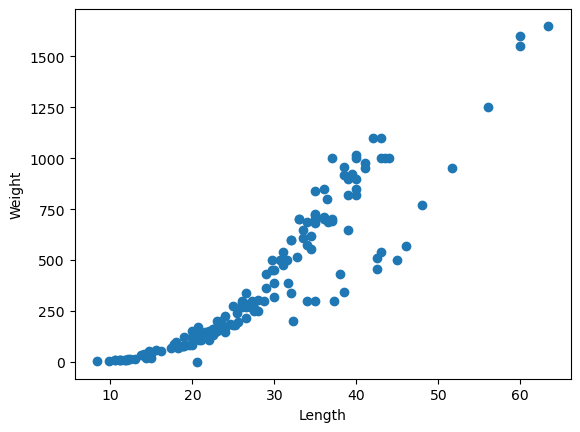

In [56]:
plt.scatter(fishDF['Length'], fishDF['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[2] 학습 준비   
- 피쳐와 타겟 분리   
- 학습용, 테스트용 데이터셋 분리  
- 피쳐 스케일링

In [57]:
feature = fishDF[fishDF['Species'] == 'Perch'][['Length']]
target = fishDF[fishDF['Species'] == 'Perch']['Weight']

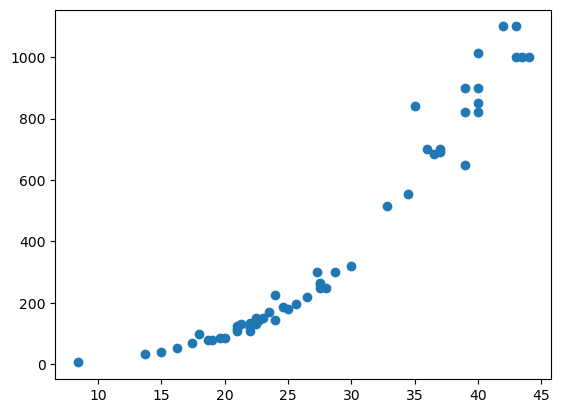

In [75]:
plt.scatter(feature, target)
plt.show()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,random_state=10)

In [60]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (44, 1), 2D
X_test : (12, 1), 2D
y_train : (44,), 1D
y_test : (12,), 1D


In [61]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

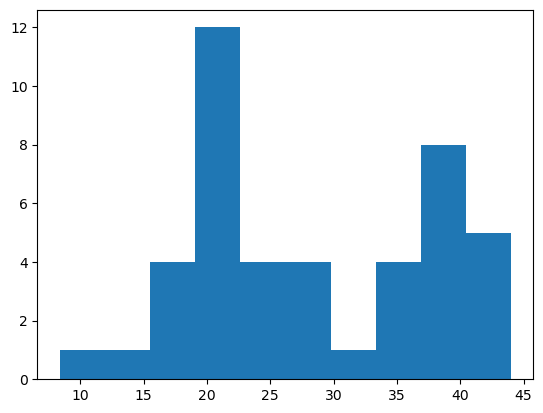

In [62]:
plt.hist(X_train)
plt.show()

In [63]:
print(f'X_train 평균 : {np.mean(X_train)}, 표준편차 : {np.std(X_train)}')

X_train 평균 : 28.6, 표준편차 : Length    9.418743
dtype: float64


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
mmscaler = MinMaxScaler()

In [66]:
mmscaler.fit(X_train)

MinMaxScaler()

In [67]:
X_train_scaled = mmscaler.transform(X_train)
X_test_scaled = mmscaler.transform(X_test)

[3] 학습 진행

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
print(f'기울기 : {model.coef_[0]}, 절편 : {model.intercept_}')

기울기 : 37.077266765043454, 절편 : -645.2530112984248


In [94]:
predict = model.coef_ * feature + model.intercept_
predict = predict.values.reshape(-1)
predict

array([-3.33803970e+02, -1.37294457e+02, -8.90940098e+01, -4.46012897e+01,
       -1.08569587e-01,  2.21377905e+01,  4.80918772e+01,  5.92150572e+01,
        8.14614173e+01,  9.62923240e+01,  1.33369591e+02,  1.33369591e+02,
        1.33369591e+02,  1.44492771e+02,  1.70446858e+02,  1.70446858e+02,
        1.70446858e+02,  1.70446858e+02,  1.70446858e+02,  1.88985491e+02,
        1.88985491e+02,  1.96400944e+02,  2.07524124e+02,  2.26062758e+02,
        2.44601391e+02,  2.44601391e+02,  2.66847751e+02,  2.81678658e+02,
        3.03925018e+02,  3.37294558e+02,  3.66956371e+02,  3.74371825e+02,
        3.74371825e+02,  3.74371825e+02,  3.92910458e+02,  4.18864545e+02,
        4.67064992e+02,  5.70881339e+02,  6.33912692e+02,  6.52451325e+02,
        7.08067226e+02,  6.89528592e+02,  7.26605859e+02,  7.26605859e+02,
        8.00760393e+02,  8.00760393e+02,  8.00760393e+02,  8.37837659e+02,
        8.37837659e+02,  8.37837659e+02,  8.37837659e+02,  9.11992193e+02,
        9.49069460e+02,  

In [98]:
# 실제 점수와 예측 점수의 차이 확인
real = feature.to_numpy()
real - predict

array([[ 342.20397047,  145.69445662,   97.49400982, ..., -940.6694596 ,
        -959.20809298, -977.74672636],
       [ 347.50397047,  150.99445662,  102.79400982, ..., -935.3694596 ,
        -953.90809298, -972.44672636],
       [ 348.80397047,  152.29445662,  104.09400982, ..., -934.0694596 ,
        -952.60809298, -971.14672636],
       ...,
       [ 376.80397047,  180.29445662,  132.09400982, ..., -906.0694596 ,
        -924.60809298, -943.14672636],
       [ 377.30397047,  180.79445662,  132.59400982, ..., -905.5694596 ,
        -924.10809298, -942.64672636],
       [ 377.80397047,  181.29445662,  133.09400982, ..., -905.0694596 ,
        -923.60809298, -942.14672636]])

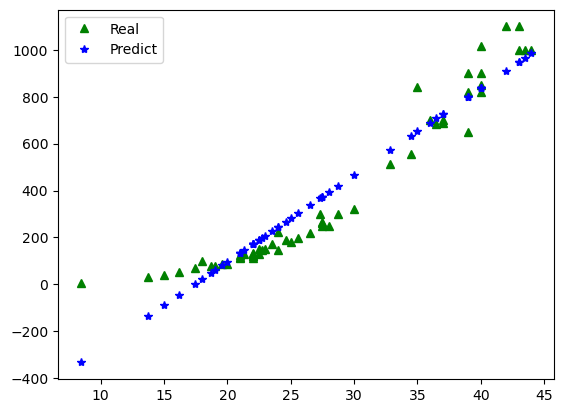

In [104]:
# 데이터 분포 확인
plt.plot(feature, target, 'g^',label = 'Real')
plt.plot(feature, predict, 'b*',label = 'Predict')
plt.legend()
plt.show()

> 다항회귀와 다중회귀
- 다항회귀
 : 독립변수가 하나 / 독립변수의 n차 항들을 포함하는 회귀분석
 : 데이터와 더 잘 맞는 곡선(비선형 관계)을 찾기 위해 사용  
- 다중회귀
 : 여러 개의 독립 변수를 사용하는 회귀 분석
 : 종속 변수에 영향을 미치는 여러 독립 변수들을 동시에 고려해 예측의 정확성 높이기 위해 사용